# Random Forest Modeling and Optimization

# Introduction

In this study, we'll utilize the Random Forest algorithm to predict individual product sales revenue, employing the Olist dataset as our data source. We begin by categorizing our dataset into dependent (Y) and independent (X) variables and subdividing it into training, testing, and validation sets to fortify our model training and evaluation processes. Following the model's training phase, we'll assess its effectiveness through appropriate performance metrics. We'll strive to fine-tune our model for enhanced prediction accuracy depending on these evaluation outcomes. The end goal of our analysis is to evaluate the aptitude of the Random Forest model in predicting not only the sales revenue of individual products, but also across varying product categories within the complete dataset. The ultimate aim of this study is to offer an in-depth insight into the potential uses and abilities of the model in sales forecasting scenarios.

In [1]:
# import the relevant libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

We begin by loading our cleaned dataset, where irrelevant features have been removed.

In [2]:
# Load the data 
df = pd.read_csv('Olist_Final.csv')
df.head()

,product_id,item_price,freight_value,payment_sequential,payment_type,payment_installments,order_purchase_timestamp,review_score,postal_code,state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sales_revenue
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,1,1,2,2017-09-13 08:59:00,5,28013,18,cool_stuff,650.0,28.0,9.0,14.0,58.9
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,1,0,1,2017-06-28 11:52:00,5,75800,8,cool_stuff,650.0,28.0,9.0,14.0,55.9
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,1,1,2,2018-05-18 10:25:00,4,30720,10,cool_stuff,650.0,28.0,9.0,14.0,64.9
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,1,1,3,2017-08-01 18:38:00,5,83070,17,cool_stuff,650.0,28.0,9.0,14.0,58.9
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,1,1,4,2017-08-10 21:48:00,5,36400,10,cool_stuff,650.0,28.0,9.0,14.0,58.9


## Data Scaling and Random Forest Analysis

We start by segregating our data into independent (X) and dependent (Y) variables. Given the significance of 'product_id' for our product-centric predictions, we first make a copy of it prior to removing it from the X variable. Subsequently, we divide the data into training and testing sets. To enhance our model's evaluation, we also carve out a separate validation set from our initial training data.

In [3]:
# Assign the X variables.
X = df.drop(['sales_revenue'], axis=1)

# Assign 'sales_revenue' column as the target variable 'y'.
y = df['sales_revenue']

# Keep a copy of the Product IDs for the test set before dropping from X
X_Product_IDs = X['product_id'].copy()

# Drop the non-numeric columns from X
X = X.drop(['product_id', 'order_purchase_timestamp', 'product_category_name'], axis=1)

# Proceed with train/test split as normal
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Split train_val set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

We begin our model development by defining a parameter grid for our Random Forest Regressor and creating an instance of this model. Using GridSearchCV, we perform an exhaustive search over the parameter grid to find the optimal parameters. After fitting this model to our training data, we print the 'best_params_' attribute to identify the optimal parameters.

In [4]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [5, 7], 
    'min_samples_split': [2, 5,], 
    'min_samples_leaf': [2, 3],
    'max_features': ['auto', 'sqrt']
}

# Create a model
rf = RandomForestRegressor(random_state=0)

# Instantiate the search model
forest_regressor = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the search to the data
forest_regressor.fit(X_train, y_train)

# Print the best parameters
print(forest_regressor.best_params_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


The above results shows, the optimal parameters for our Random Forest model are a max depth of 7, automatic max features, a minimum sample leaf size of 2, a minimum sample split of 2, and 150 estimators. These parameters resulted in the most accurate model during our grid search.

Our optimized Random Forest model generates predictions for the training, validation, and test sets. Then, we compute and display the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error for each set to assess the model's accuracy.

In [5]:
# Calculate predictions for training, validation, and test sets
y_pred_train_forest = forest_regressor.predict(X_train)
y_pred_val_forest = forest_regressor.predict(X_val)
y_pred_test_forest = forest_regressor.predict(X_test)

# Calculate MAE, MSE, RMSE for training set
mae_train = mean_absolute_error(y_train, y_pred_train_forest)
mse_train = mean_squared_error(y_train, y_pred_train_forest)
rmse_train = np.sqrt(mse_train)

# Calculate MAE, MSE, RMSE for validation set
mae_val = mean_absolute_error(y_val, y_pred_val_forest)
mse_val = mean_squared_error(y_val, y_pred_val_forest)
rmse_val = np.sqrt(mse_val)

# Calculate MAE, MSE, RMSE for test set
mae_test = mean_absolute_error(y_test, y_pred_test_forest)
mse_test = mean_squared_error(y_test, y_pred_test_forest)
rmse_test = np.sqrt(mse_test)

print("Training set - Mean Absolute Error:", mae_train)
print("Training set - Mean Squared Error:", mse_train)
print("Training set - Root Mean Squared Error:", rmse_train)

print("Validation set - Mean Absolute Error:", mae_val)
print("Validation set - Mean Squared Error:", mse_val)
print("Validation set - Root Mean Squared Error:", rmse_val)

print("Test set - Mean Absolute Error:", mae_test)
print("Test set - Mean Squared Error:", mse_test)
print("Test set - Root Mean Squared Error:", rmse_test)

Training set - Mean Absolute Error: 24.754672109352054
Training set - Mean Squared Error: 4443.562683864766
Training set - Root Mean Squared Error: 66.660053134278
Validation set - Mean Absolute Error: 27.30063499160229
Validation set - Mean Squared Error: 16289.256246010313
Validation set - Root Mean Squared Error: 127.62937062451697
Test set - Mean Absolute Error: 26.042441271441447
Test set - Mean Squared Error: 6796.049899642866
Test set - Root Mean Squared Error: 82.43815803159885


Based on the above results the evaluations shows, the Mean Absolute Error (MAE) reveals that, on average, our model's predictions are around 24.75, 27.30, and 26.04 units away from the actual values in the training, validation, and test sets, respectively. The Root Mean Squared Error (RMSE) - 66.66, 127.63, and 82.44 for each respective set - suggests that larger errors are affecting our model's performance, particularly in the validation set. The Mean Squared Error (MSE) quantifies this, showing the square of these larger deviations from the true values, being highest in the validation set at 16289.25.

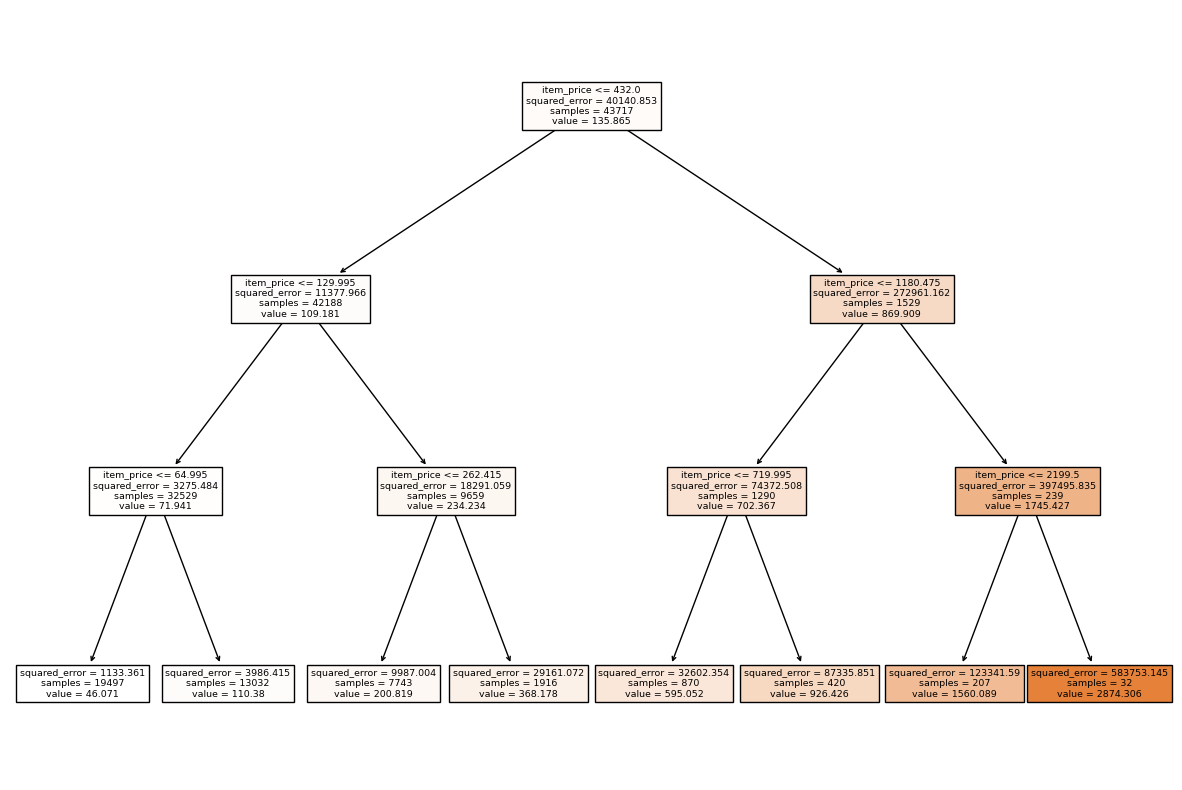

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Extract one tree
one_tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(one_tree, filled=True, feature_names=X_train.columns)
plt.show()

## Optimizing the Model

Now, We instantiate a RandomForestRegressor model with 100 estimators and a fixed random state for reproducibility. Then, we evaluate the model's performance by conducting a 5-fold cross-validation, with the scores printed for analysis.

In [7]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print scores
print(scores)

[0.61715979 0.78854358 0.86023136 0.65298793 0.86219647]


Our RandomForestRegressor model underwent 5-fold cross-validation, producing accuracy scores for each fold: 0.617, 0.789, 0.860, 0.653, and 0.862. This suggests that our model has a variable performance, with accuracy ranging from approximately 61.7% to 86.2% across different subsets of our dataset.

In light of the validation results, our next strategic step is to drop redundant features from our dataset. This process aims to refine our model by eliminating noise, with the potential to boost prediction accuracy. Let's embark on this feature pruning journey and monitor the subsequent effect on our model's performance.

In [8]:
# Drop the defined columns from the dataframe to form feature set 'X'.
X = df.drop(['sales_revenue', 'product_width_cm','product_height_cm'], axis=1)

# Assign 'sales_revenue' column as the target variable 'y'.
y = df['sales_revenue']

# Keep a copy of the Product IDs for the test set before dropping from X
X_Product_IDs = X['product_id'].copy()

# Drop the non-numeric columns from X
X = X.drop(['product_id','order_purchase_timestamp','payment_type','state','product_category_name','postal_code','payment_installments','payment_sequential','review_score','product_length_cm','product_weight_g'] , axis=1)

# Proceed with train/test split as normal
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split train_val set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Subsequently, we will retrain the model to evaluate the effects of our recent modifications. This process will shed light on the model's post-optimization performance and determine if the feature pruning has indeed enhanced its predictive accuracy.

In [9]:
# Initialize a Random Forest Regressor
forest_regressor = RandomForestRegressor(
    n_estimators=150, 
    max_depth=7,  
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='auto', 
    random_state=0
)

# Fit the model to the training data
forest_regressor.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=2,
                      n_estimators=150, random_state=0)

In [10]:
# Predict on the validation and test data
y_pred_val_forest = forest_regressor.predict(X_val)
y_pred_test_forest = forest_regressor.predict(X_test) 

# Evaluate the model
mse_val_forest = mean_squared_error(y_val, y_pred_val_forest)
mse_test_forest = mean_squared_error(y_test, y_pred_test_forest)

print("Random Forest MSE validation: ", mse_val_forest)
print("Random Forest MSE test: ", mse_test_forest)

Random Forest MSE validation:  16490.130387161826
Random Forest MSE test:  6932.479573563128


The results indicats that, our Random Forest model exhibits a Mean Squared Error (MSE) of approximately 16490.13 on the validation set. Furthermore, when evaluated on the test set, the MSE is slightly lower, coming in at about 6932.48, indicating a more accurate model performance on unseen data.

In [11]:
# Calculate R^2 for training set
y_pred_train_forest = forest_regressor.predict(X_train)
r2_train = r2_score(y_train, y_pred_train_forest)
print("Random Forest R^2 train: ", r2_train)

# Calculate R^2 for validation set
r2_val = r2_score(y_val, y_pred_val_forest)
print("Random Forest R^2 validation: ", r2_val)

# Calculate R^2 for test set
r2_test = r2_score(y_test, y_pred_test_forest)
print("Random Forest R^2 test: ", r2_test)

Random Forest R^2 train:  0.8882972818554836
Random Forest R^2 validation:  0.7337633303152843
Random Forest R^2 test:  0.8458386566822612


The Random Forest model achieved an R^2 score of 0.89 on the training set, indicating a strong fit. On the validation set, the R^2 score was 0.73, suggesting some level of overfitting. However, on the test set, the model performed well with an R^2 score of 0.85, in overal, indicating good generalization capability.

In next step, In order to evaluate the performance of the Random Forest model, the predicted revenue and actual sales revenue were added to the test set. The difference between the two values was then calculated and stored in a new column. Additionally, the product_id was mapped to its corresponding product_category_name by utilizing a dataframe containing unique product_id and product_category_name pairs, and this information was appended to the result dataframe.

In [12]:
# Add the predictions to the test set
results = X_test.copy()
results['predicted_revenue'] = y_pred_test_forest
results['sales_revenue'] = y_test

# Calculate the difference
results['difference'] = results['sales_revenue'] - results['predicted_revenue']

# Map the product_id to product_category_name
product_id_to_category = df[['product_id', 'product_category_name']].drop_duplicates().set_index('product_id')

# Add product_category_name to the result dataframe
results['product_id'] = X_Product_IDs
results['product_category_name'] = results['product_id'].map(product_id_to_category['product_category_name'])

Then, accumulate our results based on 'product_id' using a groupby function, allowing us to analyze the data at a product level. The resulting data frame, 'results_by_product_id', presents each product's summarized results.

In [13]:
# Group by product_id and product_category_name
results_by_product_id = results.groupby(['product_id']).sum()

# Display the final results
results_by_product_id

C:\Users\Work&Study\AppData\Local\Temp\ipykernel_14352\2951339930.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_by_product_id = results.groupby(['product_id']).sum()


,item_price,freight_value,predicted_revenue,sales_revenue,difference
product_id,,,,,
000d9be29b5207b54e86aa1b1ac54872,199.00,19.27,218.677318,199.00,-19.677318
001795ec6f1b187d37335e1c4704762e,38.90,9.34,51.004809,77.80,26.795191
001b237c0e9bb435f2e54071129237e9,78.90,21.19,94.355651,78.90,-15.455651
001b72dfd63e9833e8c02742adf472e3,104.97,38.93,125.493860,139.96,14.466140
00210e41887c2a8ef9f791ebc780cc36,32.98,15.10,40.571613,65.96,25.388387
...,...,...,...,...,...
ffccf0ce5eff1a158891296990107d08,619.00,39.65,635.165643,619.00,-16.165643
ffce5ed9e0bcc2e46796b988cdac733b,399.00,11.61,446.591681,399.00,-47.591681
ffd4bf4306745865e5692f69bd237893,109.96,118.04,142.433237,109.96,-32.473237


In bellow, we compute the average 'sales_revenue' and 'predicted_revenue' for each 'product_category_name' using the groupby function, consolidating our results at a category level. The resulting data frame, 'compare_df', presents the mean values for actual and predicted revenue for each product category.

In [14]:
compare_df = results.groupby('product_category_name').mean()[['sales_revenue', 'predicted_revenue']]
compare_df

C:\Users\Work&Study\AppData\Local\Temp\ipykernel_14352\2149593960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compare_df = results.groupby('product_category_name').mean()[['sales_revenue', 'predicted_revenue']]


,sales_revenue,predicted_revenue
product_category_name,,
agro_industry_and_commerce,449.802453,505.201987
air_conditioning,207.493793,182.960211
art,94.985957,100.196290
arts_and_craftmanship,71.840000,77.944533
audio,149.186849,161.625100
...,...,...
stationery,94.595122,100.555649
tablets_printing_image,90.518182,96.611124
telephony,84.549432,85.664036


At end, we produce a bar chart, the average actual and predicted revenues per product category, to further scrutinize the Random Forest model's efficacy. We collate data based on 'product_category_name' to yield the mean 'sales_revenue' and 'predicted_revenue'. This visual representation facilitates an understanding of the model's aptitude in forecasting average sales revenue across diverse product categories—a paramount factor for leveraging the model in strategic business decisions.

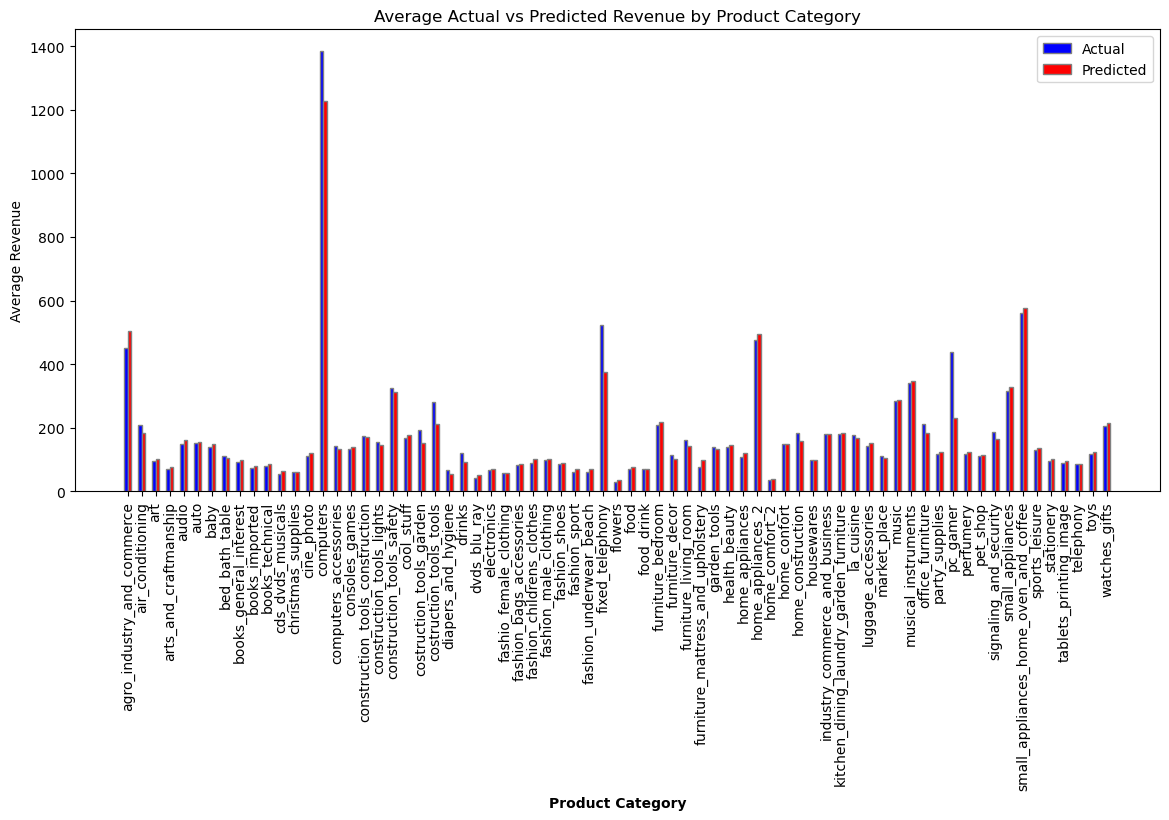

In [15]:
# Aggregate data
grouped = compare_df.groupby('product_category_name').mean()[['sales_revenue', 'predicted_revenue']]

# Generate x-coordinates for the bars
barWidth = 0.25
r1 = np.arange(len(grouped))
r2 = [x + barWidth for x in r1]

# Create bar plot
plt.figure(figsize=(14, 6))
plt.bar(r1, grouped['sales_revenue'], color='b', width=barWidth, edgecolor='grey', label='Actual')
plt.bar(r2, grouped['predicted_revenue'], color='r', width=barWidth, edgecolor='grey', label='Predicted')

# Add xticks on the middle of the group bars
plt.xlabel('Product Category', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(grouped))], grouped.index, rotation=90)

plt.ylabel('Average Revenue')
plt.title('Average Actual vs Predicted Revenue by Product Category')
plt.legend()

plt.show()

The chart above showcases a noteworthy correspondence between actual and predicted sales revenues across product categories. The narrow gap between the red (predicted) and blue (actual) bars per category indicates the impressive predictive capability of our Random Forest model. It underscores the model's proficiency in discerning underlying data patterns, making it a viable tool for upcoming sales forecasting endeavors.

# Conclusion

In conclusion, the exploration and analysis of the Random Forest model have yielded significant insights. The model demonstrated an impressive ability to predict sales revenue across various product categories, as evidenced by the close alignment between actual and predicted values. It effectively harnessed the underlying patterns in the data, making it a potent tool for future sales forecasting tasks. Therefore, the Random Forest model emerges as a robust and reliable model for sales revenue prediction in this context, underscoring its potential applicability in strategic business decisions.